## Model evaluation using learning curves

We can retrive the perfomance of a model on an evaluation dataset and then plot it to get insight into how learning unfolded during training

In [12]:
from numpy import loadtxt 
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [2]:
dataset = loadtxt('data/pima.csv', delimiter=",")

In [3]:
X = dataset[:,0:8] 
Y = dataset[:,8] 

In [4]:
seed = 9
test_size = 0.33 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,
                                                    random_state=seed) 

In [5]:
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set)

[0]	validation_0-error:0.14202	validation_0-logloss:0.54913	validation_1-error:0.33858	validation_1-logloss:0.62191
[1]	validation_0-error:0.11284	validation_0-logloss:0.45889	validation_1-error:0.33071	validation_1-logloss:0.58034
[2]	validation_0-error:0.09144	validation_0-logloss:0.39352	validation_1-error:0.30315	validation_1-logloss:0.56835
[3]	validation_0-error:0.07977	validation_0-logloss:0.35104	validation_1-error:0.29921	validation_1-logloss:0.56813
[4]	validation_0-error:0.06809	validation_0-logloss:0.30775	validation_1-error:0.32283	validation_1-logloss:0.56661
[5]	validation_0-error:0.06420	validation_0-logloss:0.27684	validation_1-error:0.31890	validation_1-logloss:0.57192
[6]	validation_0-error:0.05837	validation_0-logloss:0.25728	validation_1-error:0.31496	validation_1-logloss:0.57699
[7]	validation_0-error:0.04864	validation_0-logloss:0.23500	validation_1-error:0.30709	validation_1-logloss:0.58168


/Users/rob/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-error:0.04475	validation_0-logloss:0.22310	validation_1-error:0.30315	validation_1-logloss:0.58750
[9]	validation_0-error:0.04086	validation_0-logloss:0.21164	validation_1-error:0.29528	validation_1-logloss:0.59859
[10]	validation_0-error:0.04086	validation_0-logloss:0.19982	validation_1-error:0.29921	validation_1-logloss:0.60762
[11]	validation_0-error:0.03502	validation_0-logloss:0.18734	validation_1-error:0.30709	validation_1-logloss:0.62218
[12]	validation_0-error:0.03696	validation_0-logloss:0.18316	validation_1-error:0.29921	validation_1-logloss:0.62870
[13]	validation_0-error:0.02918	validation_0-logloss:0.17386	validation_1-error:0.29921	validation_1-logloss:0.64030
[14]	validation_0-error:0.01556	validation_0-logloss:0.16186	validation_1-error:0.29134	validation_1-logloss:0.65162
[15]	validation_0-error:0.01362	validation_0-logloss:0.15269	validation_1-error:0.29528	validation_1-logloss:0.65552
[16]	validation_0-error:0.01167	validation_0-logloss:0.14663	valid

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [6]:
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

In [7]:
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.50%


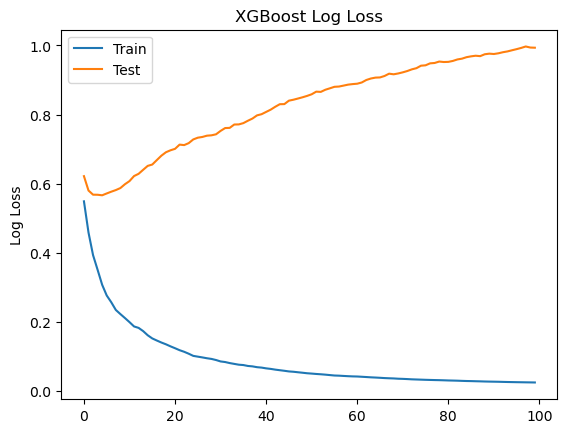

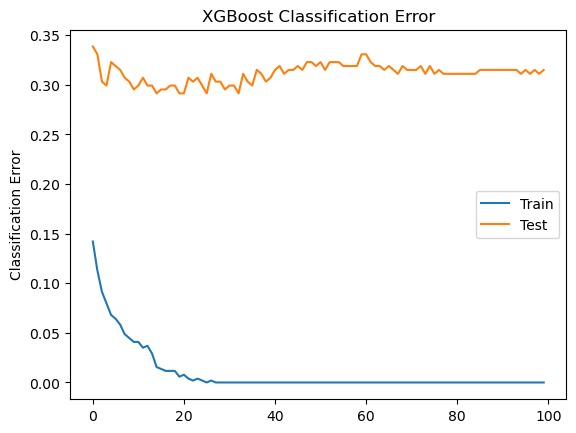

In [8]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()